# Programming with Python - 6.Creating Functions
At this point, we’ve written code to draw some interesting features in our inflammation data, loop over all our data files to quickly draw these plots for each of them, and have Python make decisions based on what it sees in our data. But, our code is getting pretty long and complicated; what if we had thousands of datasets, and didn’t want to generate a figure for every single one? Commenting out the figure-drawing code is a nuisance. Also, what if we want to use that code again, on a different dataset or at a different point in our program? Cutting and pasting it is going to make our code get very long and very repetitive, very quickly. We’d like a way to package our code so that it is easier to reuse, and Python provides for this by letting us define things called ‘functions’ — a shorthand way of re-executing longer pieces of code.

Let’s start by defining a function fahr_to_kelvin that converts temperatures from Fahrenheit to Kelvin:

In [1]:
def fahr_to_kelvin(temp):
    return ((temp - 32) * (5/9)) + 273.15

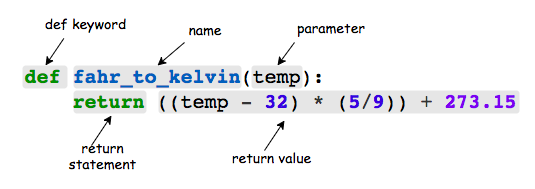
The function definition opens with the keyword def followed by the name of the function and a parenthesized list of parameter names. The body of the function — the statements that are executed when it runs — is indented below the definition line.

When we call the function, the values we pass to it are assigned to those variables so that we can use them inside the function. Inside the function, we use a return statement to send a result back to whoever asked for it.

Let’s try running our function.

In [2]:
fahr_to_kelvin(32)

273.15

This command should call our function, using “32” as the input and return the function value.

In fact, calling our own function is no different from calling any other function:

In [3]:
print('freezing point of water:', fahr_to_kelvin(32))
print('boiling point of water:', fahr_to_kelvin(212))

('freezing point of water:', 273.15)
('boiling point of water:', 273.15)


We’ve successfully called the function that we defined, and we have access to the value that we returned.

# Integer Division
We are using Python 3, where division always returns a floating point number:

In [6]:
print(5/9)

0


Unfortunately, this wasn’t the case in Python 2:



In [7]:
5/9

0

If you are using Python 2 and want to keep the fractional part of division you need to convert one or the other number to floating point:

In [8]:
float(5)/9

0.5555555555555556

In [9]:
5/float(9)

0.5555555555555556

In [10]:
5.0/9

0.5555555555555556

In [11]:
5/9.0

0.5555555555555556

And if you want an integer result from division in Python 3, use a double-slash:

In [12]:
4//2

2

In [13]:
3//2

1

# Composing Functions
Now that we’ve seen how to turn Fahrenheit into Kelvin, it’s easy to turn Kelvin into Celsius:

In [14]:
def kelvin_to_celsius(temp_k):
    return temp_k - 273.15

print('absolute zero in Celsius:', kelvin_to_celsius(0.0))

('absolute zero in Celsius:', -273.15)


What about converting Fahrenheit to Celsius? We could write out the formula, but we don’t need to. Instead, we can compose the two functions we have already created:

In [15]:
def fahr_to_celsius(temp_f):
    temp_k = fahr_to_kelvin(temp_f)
    result = kelvin_to_celsius(temp_k)
    return result

print('freezing point of water in Celsius:', fahr_to_celsius(32.0))

('freezing point of water in Celsius:', 0.0)


This is our first taste of how larger programs are built: we define basic operations, then combine them in ever-large chunks to get the effect we want. Real-life functions will usually be larger than the ones shown here — typically half a dozen to a few dozen lines — but they shouldn’t ever be much longer than that, or the next person who reads it won’t be able to understand what’s going on.

# Tidying up
Now that we know how to wrap bits of code up in functions, we can make our inflammation analysis easier to read and easier to reuse. First, let’s make an analyze function that generates our plots:

In [25]:
import numpy
# def analyze(filename):

#     data = numpy.loadtxt(fname=filename, delimiter=',')

#     fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

#     axes1 = fig.add_subplot(1, 3, 1)
#     axes2 = fig.add_subplot(1, 3, 2)
#     axes3 = fig.add_subplot(1, 3, 3)

#     axes1.set_ylabel('average')
#     axes1.plot(numpy.mean(data, axis=0))

#     axes2.set_ylabel('max')
#     axes2.plot(numpy.max(data, axis=0))

#     axes3.set_ylabel('min')
#     axes3.plot(numpy.min(data, axis=0))

#     fig.tight_layout()
#     matplotlib.pyplot.show()

and another function called detect_problems that checks for those systematics we noticed:

In [26]:
# def detect_problems(filename):

#     data = numpy.loadtxt(fname=filename, delimiter=',')

#     if numpy.max(data, axis=0)[0] == 0 and numpy.max(data, axis=0)[20] == 20:
#         print('Suspicious looking maxima!')
#     elif numpy.sum(numpy.min(data, axis=0)) == 0:
#         print('Minima add up to zero!')
#     else:
#         print('Seems OK!')

Notice that rather than jumbling this code together in one giant for loop, we can now read and reuse both ideas separately. We can reproduce the previous analysis with a much simpler for loop:



In [27]:
#for f in filenames[:3]:
#    print(f)
#    analyze(f)
#    detect_problems(f)

By giving our functions human-readable names, we can more easily read and understand what is happening in the for loop. Even better, if at some later date we want to use either of those pieces of code again, we can do so in a single line.



# Testing and Documenting
Once we start putting things in functions so that we can re-use them, we need to start testing that those functions are working correctly. To see how to do this, let’s write a function to center a dataset around a particular value:



In [28]:
def center(data, desired):
    return (data - numpy.mean(data)) + desired

We could test this on our actual data, but since we don’t know what the values ought to be, it will be hard to tell if the result was correct. Instead, let’s use NumPy to create a matrix of 0’s and then center that around 3:

In [29]:
z = numpy.zeros((2,2))
print(center(z, 3))

[[ 3.  3.]
 [ 3.  3.]]


That looks right, so let’s try center on our real data:

In [30]:
data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')
print(center(data, 0))

[[-6.14875 -6.14875 -5.14875 ..., -3.14875 -6.14875 -6.14875]
 [-6.14875 -5.14875 -4.14875 ..., -5.14875 -6.14875 -5.14875]
 [-6.14875 -5.14875 -5.14875 ..., -4.14875 -5.14875 -5.14875]
 ..., 
 [-6.14875 -5.14875 -5.14875 ..., -5.14875 -5.14875 -5.14875]
 [-6.14875 -6.14875 -6.14875 ..., -6.14875 -4.14875 -6.14875]
 [-6.14875 -6.14875 -5.14875 ..., -5.14875 -5.14875 -6.14875]]


It’s hard to tell from the default output whether the result is correct, but there are a few simple tests that will reassure us:

In [31]:
print('original min, mean, and max are:', numpy.min(data), numpy.mean(data), numpy.max(data))
centered = center(data, 0)
print('min, mean, and max of centered data are:', numpy.min(centered), numpy.mean(centered), numpy.max(centered))

('original min, mean, and max are:', 0.0, 6.1487499999999997, 20.0)
('min, mean, and max of centered data are:', -6.1487499999999997, 2.8421709430404008e-16, 13.85125)


That seems almost right: the original mean was about 6.1, so the lower bound from zero is now about -6.1. The mean of the centered data isn’t quite zero — we’ll explore why not in the challenges — but it’s pretty close. We can even go further and check that the standard deviation hasn’t changed:

In [32]:
print('std dev before and after:', numpy.std(data), numpy.std(centered))

('std dev before and after:', 4.6138331971185664, 4.6138331971185664)


Those values look the same, but we probably wouldn’t notice if they were different in the sixth decimal place. Let’s do this instead:

In [33]:
print('difference in standard deviations before and after:', numpy.std(data) - numpy.std(centered))

('difference in standard deviations before and after:', 0.0)


Again, the difference is very small. It’s still possible that our function is wrong, but it seems unlikely enough that we should probably get back to doing our analysis. We have one more task first, though: we should write some documentation for our function to remind ourselves later what it’s for and how to use it.

The usual way to put documentation in software is to add comments like this:



In [34]:
# center(data, desired): return a new array containing the original data centered around the desired value.
def center(data, desired):
    return (data - numpy.mean(data)) + desired

There’s a better way, though. If the first thing in a function is a string that isn’t assigned to a variable, that string is attached to the function as its documentation:

In [35]:
def center(data, desired):
    '''Return a new array containing the original data centered around the desired value.'''
    return (data - numpy.mean(data)) + desired

This is better because we can now ask Python’s built-in help system to show us the documentation for the function:

In [36]:
help(center)

Help on function center in module __main__:

center(data, desired)
    Return a new array containing the original data centered around the desired value.



A string like this is called a docstring. We don’t need to use triple quotes when we write one, but if we do, we can break the string across multiple lines:

In [37]:
def center(data, desired):
    '''Return a new array containing the original data centered around the desired value.
    Example: center([1, 2, 3], 0) => [-1, 0, 1]'''
    return (data - numpy.mean(data)) + desired

help(center)

Help on function center in module __main__:

center(data, desired)
    Return a new array containing the original data centered around the desired value.
    Example: center([1, 2, 3], 0) => [-1, 0, 1]



# Defining Defaults
We have passed parameters to functions in two ways: directly, as in type(data), and by name, as in numpy.loadtxt(fname='something.csv', delimiter=','). In fact, we can pass the filename to loadtxt without the fname=:

In [38]:
numpy.loadtxt('data/inflammation-01.csv', delimiter=',')

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  1.,  2., ...,  1.,  0.,  1.],
       [ 0.,  1.,  1., ...,  2.,  1.,  1.],
       ..., 
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.]])

but we still need to say delimiter=:



In [39]:
numpy.loadtxt('data/inflammation-01.csv', ',')

TypeError: data type "," not understood

To understand what’s going on, and make our own functions easier to use, let’s re-define our center function like this:

In [40]:
def center(data, desired=0.0):
    '''Return a new array containing the original data centered around the desired value (0 by default).
    Example: center([1, 2, 3], 0) => [-1, 0, 1]'''
    return (data - numpy.mean(data)) + desired

The key change is that the second parameter is now written desired=0.0 instead of just desired. If we call the function with two arguments, it works as it did before:

In [41]:
test_data = numpy.zeros((2, 2))
print(center(test_data, 3))

[[ 3.  3.]
 [ 3.  3.]]


But we can also now call it with just one parameter, in which case desired is automatically assigned the default value of 0.0:

In [42]:
more_data = 5 + numpy.zeros((2, 2))
print('data before centering:')
print(more_data)
print('centered data:')
print(center(more_data))

data before centering:
[[ 5.  5.]
 [ 5.  5.]]
centered data:
[[ 0.  0.]
 [ 0.  0.]]


This is handy: if we usually want a function to work one way, but occasionally need it to do something else, we can allow people to pass a parameter when they need to but provide a default to make the normal case easier. The example below shows how Python matches values to parameters:

In [43]:
def display(a=1, b=2, c=3):
    print('a:', a, 'b:', b, 'c:', c)

print('no parameters:')
display()
print('one parameter:')
display(55)
print('two parameters:')
display(55, 66)

no parameters:
('a:', 1, 'b:', 2, 'c:', 3)
one parameter:
('a:', 55, 'b:', 2, 'c:', 3)
two parameters:
('a:', 55, 'b:', 66, 'c:', 3)


As this example shows, parameters are matched up from left to right, and any that haven’t been given a value explicitly get their default value. We can override this behavior by naming the value as we pass it in:

In [44]:
print('only setting the value of c')
display(c=77)

only setting the value of c
('a:', 1, 'b:', 2, 'c:', 77)


With that in hand, let’s look at the help for numpy.loadtxt:

In [45]:
help(numpy.loadtxt)

Help on function loadtxt in module numpy.lib.npyio:

loadtxt(fname, dtype=<type 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file, str, or pathlib.Path
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings for Python 3k.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str or sequence, optional
        The characters or list of

There’s a lot of information here, but the most important part is the first couple of lines:

In [49]:
#loadtxt(fname, dtype=<type 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None,
#        unpack=False, ndmin=0)       unpack=False, ndmin=0)

This tells us that loadtxt has one parameter called fname that doesn’t have a default value, and eight others that do. If we call the function like this:

In [52]:
numpy.loadtxt('data/inflammation-01.csv', ',')

TypeError: data type "," not understood

then the filename is assigned to fname (which is what we want), but the delimiter string ',' is assigned to dtype rather than delimiter, because dtype is the second parameter in the list. However ',' isn’t a known dtype so our code produced an error message when we tried to run it. When we call loadtxt we don’t have to provide fname= for the filename because it’s the first item in the list, but if we want the ',' to be assigned to the variable delimiter, we do have to provide delimiter= for the second parameter since delimiter is not the second parameter in the list.

# Readable functions
Consider these two functions:

In [53]:
def s(p):
    a = 0
    for v in p:
        a += v
    m = a / len(p)
    d = 0
    for v in p:
        d += (v - m) * (v - m)
    return numpy.sqrt(d / (len(p) - 1))

def std_dev(sample):
    sample_sum = 0
    for value in sample:
        sample_sum += value

    sample_mean = sample_sum / len(sample)

    sum_squared_devs = 0
    for value in sample:
        sum_squared_devs += (value - sample_mean) * (value - sample_mean)

    return numpy.sqrt(sum_squared_devs / (len(sample) - 1))

The functions s and std_dev are computationally equivalent (they both calculate the sample standard deviation), but to a human reader, they look very different. You probably found std_dev much easier to read and understand than s.

As this example illustrates, both documentation and a programmer’s coding style combine to determine how easy it is for others to read and understand the programmer’s code. Choosing meaningful variable names and using blank spaces to break the code into logical “chunks” are helpful techniques for producing readable code. This is useful not only for sharing code with others, but also for the original programmer. If you need to revisit code that you wrote months ago and haven’t thought about since then, you will appreciate the value of readable code!

# Combining Strings
“Adding” two strings produces their concatenation: 'a' + 'b' is 'ab'. Write a function called fence that takes two parameters called original and wrapper and returns a new string that has the wrapper character at the beginning and end of the original. A call to your function should look like this:

In [57]:
def fence(original, wrapper):
    return wrapper + original + wrapper

In [58]:
print(fence('name', '*'))

*name*


# Selecting Characters From Strings
If the variable s refers to a string, then s[0] is the string’s first character and s[-1] is its last. Write a function called outer that returns a string made up of just the first and last characters of its input. A call to your function should look like this:

In [62]:
def outer(input_string):
    return input_string[0] + input_string[-1]

In [63]:
print(outer('helium'))

hm


# Rescaling an Array
Write a function rescale that takes an array as input and returns a corresponding array of values scaled to lie in the range 0.0 to 1.0. (Hint: If L and H are the lowest and highest values in the original array, then the replacement for a value v should be (v-L) / (H-L).)

In [64]:
def rescale(input_array):
    L = numpy.min(input_array)
    H = numpy.max(input_array)
    output_array = (input_array - L) / (H - L)
    return output_array

# Testing and Documenting Your Function
Run the commands help(numpy.arange) and help(numpy.linspace) to see how to use these functions to generate regularly-spaced values, then use those values to test your rescale function. Once you’ve successfully tested your function, add a docstring that explains what it does.

In [66]:
'''Takes an array as input, and returns a corresponding array scaled so
that 0 corresponds to the minimum and 1 to the maximum value of the input array.

Examples:
>>> rescale(numpy.arange(10.0))
array([ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
       0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ])
>>> rescale(numpy.linspace(0, 100, 5))
array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])
'''

'Takes an array as input, and returns a corresponding array scaled so\nthat 0 corresponds to the minimum and 1 to the maximum value of the input array.\n\nExamples:\n>>> rescale(numpy.arange(10.0))\narray([ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,\n       0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ])\n>>> rescale(numpy.linspace(0, 100, 5))\narray([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])\n'

# Defining Defaults
Rewrite the rescale function so that it scales data to lie between 0.0 and 1.0 by default, but will allow the caller to specify lower and upper bounds if they want. Compare your implementation to your neighbor’s: do the two functions always behave the same way?

In [67]:
def rescale(input_array, low_val=0.0, high_val=1.0):
    '''rescales input array values to lie between low_val and high_val'''
    L = numpy.min(input_array)
    H = numpy.max(input_array)
    intermed_array = (input_array - L) / (H - L)
    output_array = intermed_array * (high_val - low_val) + low_val
    return output_array

# Variables Inside and Outside Functions
What does the following piece of code display when run — and why?

In [69]:
f = 0
k = 0

def f2k(f):
  k = ((f-32)*(5.0/9.0)) + 273.15
  return k

f2k(8)
f2k(41)
f2k(32)

print(k)

0


In [72]:
answer = "k is 0 because the k inside the function f2k doesn’t know about the k defined outside the function."

In [73]:
print answer

k is 0 because the k inside the function f2k doesn’t know about the k defined outside the function.


# Mixing Default and Non-Default Parameters
Given the following code:

In [75]:
def numbers(one, three, two=2,four=4):
    n = str(one) + str(two) + str(three) + str(four)
    return n

print(numbers(1, three=3))

1234


what do you expect will be printed? What is actually printed? What rule do you think Python is following?
<br>
1, 1234
<br>
2, one2three4
<br>
3, 1239
<br>
4, SyntaxError
<br>
Given that, what does the following piece of code display when run?

In [77]:
def func(a, b=3, c=6):
  print('a: ', a, 'b: ', b, 'c:', c)

func(-1, 2)

('a: ', -1, 'b: ', 2, 'c:', 6)


1, a: b: 3 c: 6
<br>
2, a: -1 b: 3 c: 6
<br>
a: -1 b: 2 c: 6
<br>
a: b: -1 c: 2
<br>

In [80]:
answer = "Attempting to define the numbers function results in 4. SyntaxError. The defined parameters two and four are given default values. Because one and three are not given default values, they are required to be included as arguments when the function is called and must be placed before any parameters that have default values in the function definition. The given call to func displays a: -1 b: 2 c: 6. -1 is assigned to the first parameter a, 2 is assigned to the next parameter b, and c is not passed a value, so it uses its default value 6."

In [81]:
print answer

Attempting to define the numbers function results in 4. SyntaxError. The defined parameters two and four are given default values. Because one and three are not given default values, they are required to be included as arguments when the function is called and must be placed before any parameters that have default values in the function definition. The given call to func displays a: -1 b: 2 c: 6. -1 is assigned to the first parameter a, 2 is assigned to the next parameter b, and c is not passed a value, so it uses its default value 6.


# The Old Switcheroo
Consider this code:

In [82]:
a = 3
b = 7

def swap(a, b):
    temp = a
    a = b
    b = temp

swap(a, b)

print(a, b)

(3, 7)


Which of the following would be printed if you were to run this code? Why did you pick this answer?
<br>
1, 7 3
<br>
2, 3 7
<br>
3, 3 3
<br>
4, 7 7

In [85]:
answer = "3, 7 is correct. Initially a has a value of 3 and b has a value of 7. When the swap function is called, it creates local variables (also called a and b in this case) and trades their values. The function does not return any values and does not alter a or b outside of its local copy. Therefore the original values of a and b remain unchanged."

In [86]:
print answer

3, 7 is correct. Initially a has a value of 3 and b has a value of 7. When the swap function is called, it creates local variables (also called a and b in this case) and trades their values. The function does not return any values and does not alter a or b outside of its local copy. Therefore the original values of a and b remain unchanged.


# Readable Code
Revise a function you wrote for one of the previous exercises to try to make the code more readable. Then, collaborate with one of your neighbors to critique each other’s functions and discuss how your function implementations could be further improved to make them more readable.

# Key Points
- Define a function using def name(...params...).
- The body of a function must be indented.
- Call a function using name(...values...).
- Numbers are stored as integers or floating-point numbers.
- Integer division produces the whole part of the answer (not the fractional part).
- Each time a function is called, a new stack frame is created on the call stack to hold its parameters and local variables.
- Python looks for variables in the current stack frame before looking for them at the top level.
- Use help(thing) to view help for something.
- Put docstrings in functions to provide help for that function.
- Specify default values for parameters when defining a function using name=value in the parameter list.
- Parameters can be passed by matching based on name, by position, or by omitting them (in which case the default value is used).